In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA




C:\Users\patil\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\patil\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv("ifood_df.csv")


In [3]:
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nMissing values:\n", df.isnull().sum())

Shape: (2205, 39)

Columns: ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow', 'education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds', 'AcceptedCmpOverall']

Missing values:
 Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurcha

In [4]:
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df = df.fillna(df.median(numeric_only=True))

In [7]:
print(df.dtypes)

Income                  float64
Kidhome                   int64
Teenhome                  int64
Recency                   int64
MntWines                  int64
MntFruits                 int64
MntMeatProducts           int64
MntFishProducts           int64
MntSweetProducts          int64
MntGoldProds              int64
NumDealsPurchases         int64
NumWebPurchases           int64
NumCatalogPurchases       int64
NumStorePurchases         int64
NumWebVisitsMonth         int64
AcceptedCmp3              int64
AcceptedCmp4              int64
AcceptedCmp5              int64
AcceptedCmp1              int64
AcceptedCmp2              int64
Complain                  int64
Z_CostContact             int64
Z_Revenue                 int64
Response                  int64
Age                       int64
Customer_Days             int64
marital_Divorced          int64
marital_Married           int64
marital_Single            int64
marital_Together          int64
marital_Widow             int64
educatio

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,2021.0,51687.258783,20713.046401,1730.0,35416.0,51412.0,68274.0,113734.0
Kidhome,2021.0,0.443345,0.536196,0.0,0.0,0.0,1.0,2.0
Teenhome,2021.0,0.509649,0.546393,0.0,0.0,0.0,1.0,2.0
Recency,2021.0,48.880752,28.950917,0.0,24.0,49.0,74.0,99.0
MntWines,2021.0,306.492331,337.603877,0.0,24.0,178.0,507.0,1493.0
MntFruits,2021.0,26.364671,39.776518,0.0,2.0,8.0,33.0,199.0
MntMeatProducts,2021.0,166.059871,219.869126,0.0,16.0,68.0,230.0,1725.0
MntFishProducts,2021.0,37.603662,54.892196,0.0,3.0,12.0,50.0,259.0
MntSweetProducts,2021.0,27.268679,41.575454,0.0,1.0,8.0,34.0,262.0
MntGoldProds,2021.0,43.921821,51.678211,0.0,9.0,25.0,56.0,321.0


In [9]:
if 'Income' in df.columns:
    avg_income = df['Income'].mean()
    print(f"Average Income: ₹{avg_income:,.2f}")

Average Income: ₹51,687.26


In [10]:
purchase_cols = [col for col in df.columns if 'Mnt' in col]
df['Total_Spending'] = df[purchase_cols].sum(axis=1)

print("\nAverage Purchase Value:", df['Total_Spending'].mean())
print("Median Purchase Value:", df['Total_Spending'].median())


Average Purchase Value: 1691.367639782286
Median Purchase Value: 1029.0


In [11]:
freq_cols = [col for col in df.columns if 'Num' in col]
df['Total_Transactions'] = df[freq_cols].sum(axis=1)

df[['Total_Spending', 'Total_Transactions']].describe()


,Total_Spending,Total_Transactions
count,2021.000000,2021.000000
mean,1691.367640,20.238001
std,1730.327247,7.220657
min,12.000000,6.000000
25%,165.000000,14.000000
50%,1029.000000,20.000000
75%,2892.000000,25.000000
max,7473.000000,46.000000


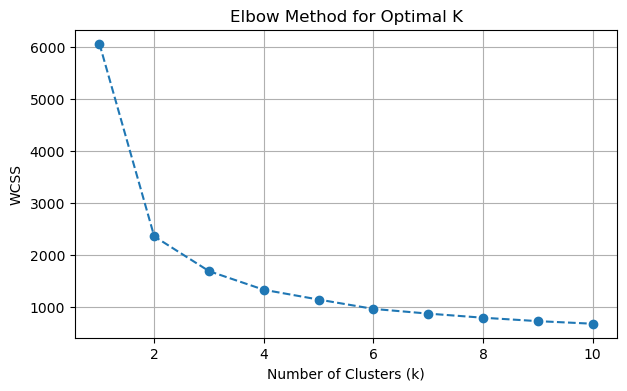

Cluster
1    796
3    455
0    415
2    355
Name: count, dtype: int64

In [12]:


features = ['Total_Spending', 'Total_Transactions']
if 'Income' in df.columns:
    features.append('Income')

X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Compute WCSS
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, algorithm='full')
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(7, 4))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

# Apply K-Means
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10, algorithm='elkan')
df['Cluster'] = kmeans.fit_predict(X_scaled)

df['Cluster'].value_counts()


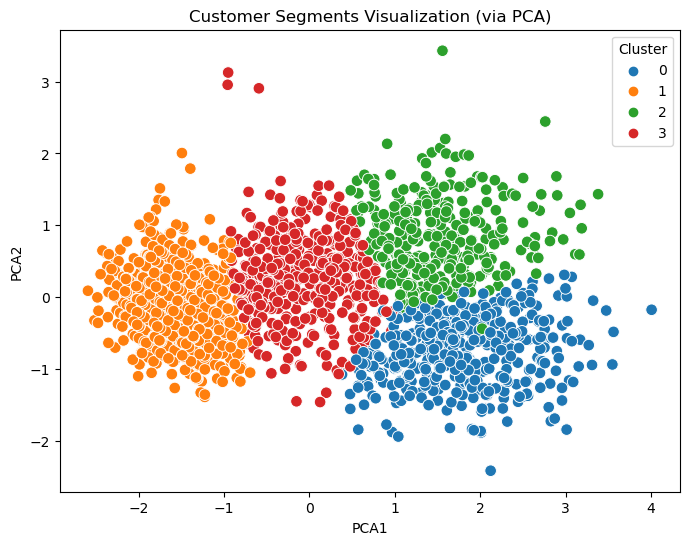

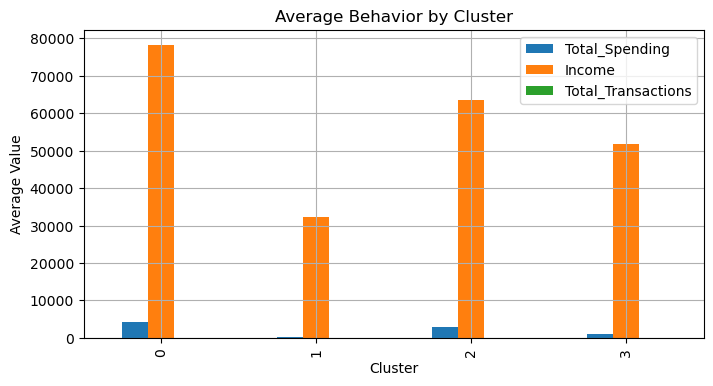

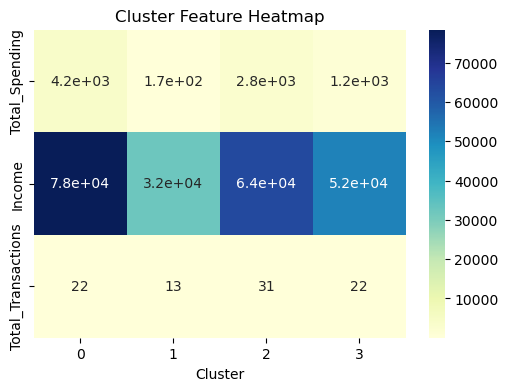

In [13]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)
df['PCA1'], df['PCA2'] = pca_components[:,0], pca_components[:,1]

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='tab10', s=70)
plt.title('Customer Segments Visualization (via PCA)')
plt.legend(title='Cluster')
plt.show()

cluster_summary = df.groupby('Cluster')[['Total_Spending', 'Income', 'Total_Transactions']].mean()
cluster_summary.plot(kind='bar', figsize=(8,4))
plt.title('Average Behavior by Cluster')
plt.ylabel('Average Value')
plt.grid(True)
plt.show()

plt.figure(figsize=(6,4))
sns.heatmap(cluster_summary.T, annot=True, cmap='YlGnBu')
plt.title('Cluster Feature Heatmap')
plt.show()


Insights and Recommendations

Cluster Analysis Summary:

1.Cluster 0 (High Income & High Spending):
    Represents premium customers.
    Focus marketing campaigns and loyalty rewards here.

2.Cluster 1 (Moderate Income, Moderate Spending):
    Growth segment — target with combo offers or personalized promotions.

3.Cluster 2 (Low Income, Low Spending):
    Price-sensitive customers — push discounts or bundles.

4.Cluster 3 (High Income, Low Spending):
    Upsell opportunities — consider premium product exposure or luxury campaigns.

Recommendations:

Introduce loyalty programs for high-value clusters.
Use targeted email marketing based on cluster profiles.
Offer personalized product recommendations using behavioral data.
Conduct churn analysis for low-engagement clusters.